In [1]:
from dask.distributed import Client
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:32989,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:38677,Total threads: 2
Dashboard: /proxy/45409/status,Memory: 9.14 GiB
Nanny: tcp://127.0.0.1:38303,


In [3]:
dir = '/g/data/x77/amh157/RYF-gmtest/'

In [4]:
# these lon/lat arrays are NOT masked
geolon_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolon_t
geolat_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolat_t


land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gray',
                                        linewidth=0.5)

# Plot original GM/Redi coefficients

Note here that we are using the baroclinic closure scheme for varying GM coefficient. 
The two parameters we may like to play with are the scaling (just a prefactor) and the grid-scaling which reduces the coefficient near the equator and increases it near the poles.

```
agm_closure_scaling = 0.07
agm_closure_grid_scaling_power = 2.0 (default)
```
The Redi coefficient just uses the grid-scaling.


In [5]:
gmfile = 'output000/ocean/ocean-2d-agm-1-monthly-mean-ym_1901_01.nc'
agm = xr.open_dataset(dir+gmfile).agm.mean('time')
agm = agm.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()
redifile = 'output000/ocean/ocean-2d-aredi-1-monthly-mean-ym_1901_01.nc'
aredi = xr.open_dataset(dir+redifile).aredi.mean('time')
aredi = aredi.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()

Text(0, 0.5, 'AGM/ARedi (m$^2$/s)')

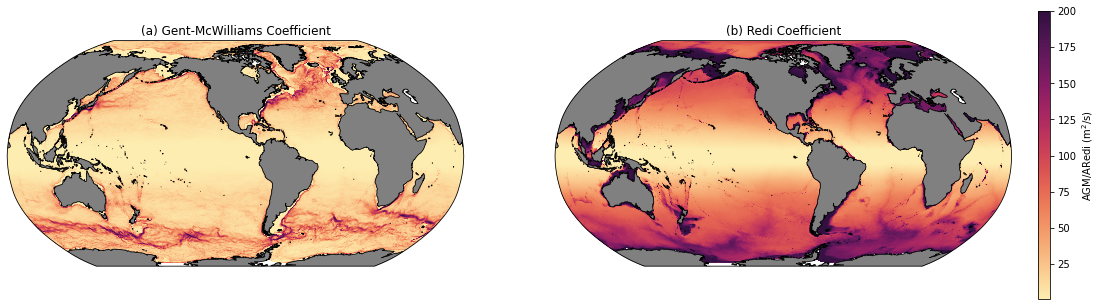

In [6]:
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1,2,1,projection=ccrs.Robinson(central_longitude=-100))
ax1.coastlines(resolution='50m')
ax1.add_feature(land_50m)
p1 = agm.plot(ax=ax1,x='geolon_t', y='geolat_t',cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax1.set_title('(a) Gent-McWilliams Coefficient')

ax2 = plt.subplot(1,2,2,projection=ccrs.Robinson(central_longitude=-100))
ax2.coastlines(resolution='50m')
ax2.add_feature(land_50m)
aredi.plot(ax=ax2,x='geolon_t', y='geolat_t',cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax2.set_title('(b) Redi Coefficient')


ax4 = plt.axes([0.92,0.25,0.01,0.5])
cb = plt.colorbar(p1,cax=ax4,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi (m$^2$/s)')

# Plot increased coefficients

```
agm_closure_scaling = 0.14
agm_closure_grid_scaling_power = 2.0 (default)
```

In [7]:
gmfile = 'output001/ocean/ocean-2d-agm-1-monthly-mean-ym_1902_01.nc'
agm_alt1 = xr.open_dataset(dir+gmfile).agm.mean('time')
agm_alt1 = agm_alt1.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()
redifile = 'output001/ocean/ocean-2d-aredi-1-monthly-mean-ym_1902_01.nc'
aredi_alt1 = xr.open_dataset(dir+redifile).aredi.mean('time')
aredi_alt1 = aredi_alt1.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()

Text(0, 0.5, 'AGM/ARedi diff (m$^2$/s)')

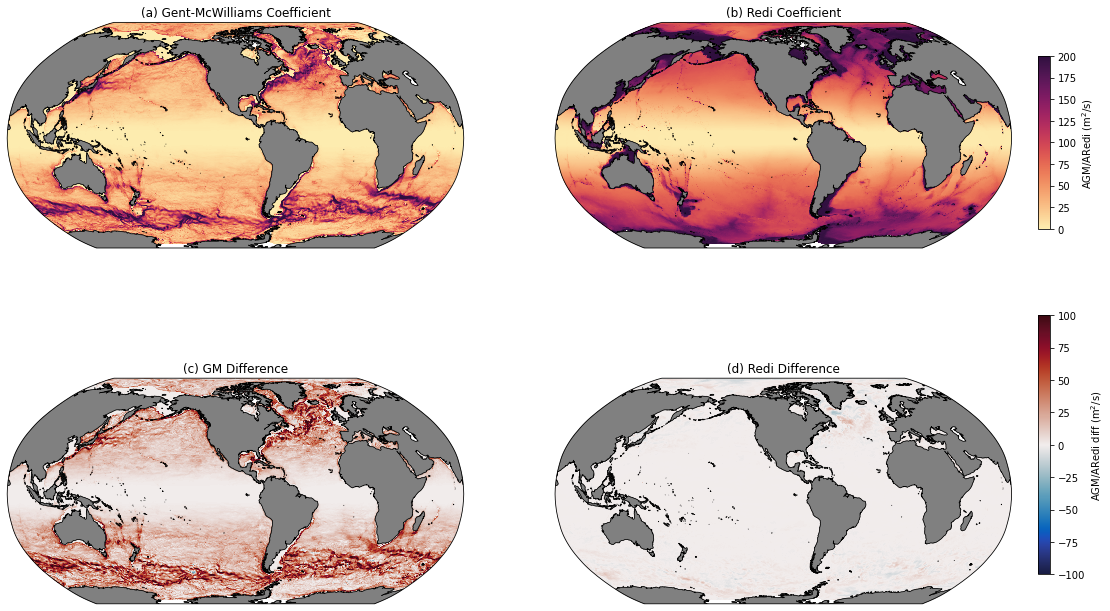

In [8]:
plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1,projection=ccrs.Robinson(central_longitude=-100))
ax1.coastlines(resolution='50m')
ax1.add_feature(land_50m)
p1 = agm_alt1.plot(ax=ax1,x='geolon_t', y='geolat_t',vmin=0,vmax=200,cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax1.set_title('(a) Gent-McWilliams Coefficient')

ax2 = plt.subplot(2,2,2,projection=ccrs.Robinson(central_longitude=-100))
ax2.coastlines(resolution='50m')
ax2.add_feature(land_50m)
aredi_alt1.plot(ax=ax2,x='geolon_t', y='geolat_t',vmin=0,vmax=200,cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax2.set_title('(b) Redi Coefficient')

ax3 = plt.subplot(2,2,3,projection=ccrs.Robinson(central_longitude=-100))
ax3.coastlines(resolution='50m')
ax3.add_feature(land_50m)
p3 = (agm_alt1-agm).plot(ax=ax3,x='geolon_t', y='geolat_t',vmin=-100,vmax=100,cmap=cm.cm.balance,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax3.set_title('(c) GM Difference')

ax4 = plt.subplot(2,2,4,projection=ccrs.Robinson(central_longitude=-100))
ax4.coastlines(resolution='50m')
ax4.add_feature(land_50m)
(aredi_alt1-aredi).plot(ax=ax4,x='geolon_t', y='geolat_t',vmin=-100,vmax=100,cmap=cm.cm.balance,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax4.set_title('(d) Redi Difference')


ax4 = plt.axes([0.92,0.6,0.01,0.2])
cb = plt.colorbar(p1,cax=ax4,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi (m$^2$/s)')


ax5 = plt.axes([0.92,0.2,0.01,0.3])
cb = plt.colorbar(p3,cax=ax5,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi diff (m$^2$/s)')

# Increased coefficient and increased scaling power

```
agm_closure_scaling = 0.14
agm_closure_grid_scaling_power = 3.0
```

In [9]:
gmfile = 'output002/ocean/ocean-2d-agm-1-monthly-mean-ym_1903_01.nc'
agm_alt2 = xr.open_dataset(dir+gmfile).agm.mean('time')
agm_alt2 = agm_alt2.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()
redifile = 'output002/ocean/ocean-2d-aredi-1-monthly-mean-ym_1903_01.nc'
aredi_alt2 = xr.open_dataset(dir+redifile).aredi.mean('time')
aredi_alt2 = aredi_alt2.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()

Text(0, 0.5, 'AGM/ARedi diff (m$^2$/s)')

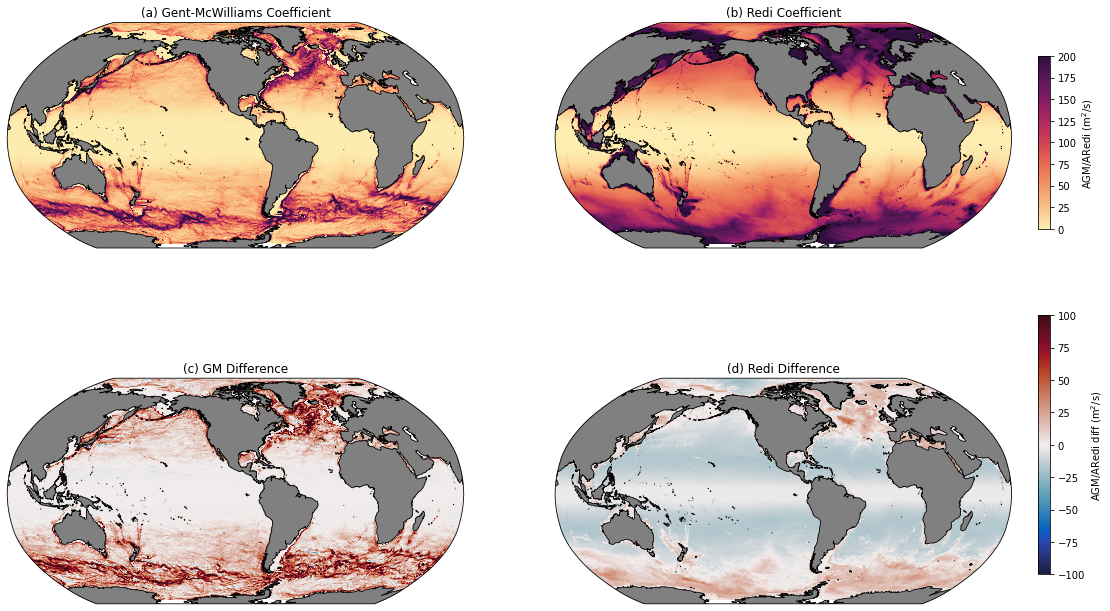

In [10]:
plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1,projection=ccrs.Robinson(central_longitude=-100))
ax1.coastlines(resolution='50m')
ax1.add_feature(land_50m)
p1 = agm_alt2.plot(ax=ax1,x='geolon_t', y='geolat_t',vmin=0,vmax=200,cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax1.set_title('(a) Gent-McWilliams Coefficient')

ax2 = plt.subplot(2,2,2,projection=ccrs.Robinson(central_longitude=-100))
ax2.coastlines(resolution='50m')
ax2.add_feature(land_50m)
aredi_alt2.plot(ax=ax2,x='geolon_t', y='geolat_t',vmin=0,vmax=200,cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax2.set_title('(b) Redi Coefficient')

ax3 = plt.subplot(2,2,3,projection=ccrs.Robinson(central_longitude=-100))
ax3.coastlines(resolution='50m')
ax3.add_feature(land_50m)
p3 = (agm_alt2-agm).plot(ax=ax3,x='geolon_t', y='geolat_t',vmin=-100,vmax=100,cmap=cm.cm.balance,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax3.set_title('(c) GM Difference')

ax4 = plt.subplot(2,2,4,projection=ccrs.Robinson(central_longitude=-100))
ax4.coastlines(resolution='50m')
ax4.add_feature(land_50m)
(aredi_alt2-aredi).plot(ax=ax4,x='geolon_t', y='geolat_t',vmin=-100,vmax=100,cmap=cm.cm.balance,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax4.set_title('(d) Redi Difference')


ax4 = plt.axes([0.92,0.6,0.01,0.2])
cb = plt.colorbar(p1,cax=ax4,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi (m$^2$/s)')


ax5 = plt.axes([0.92,0.2,0.01,0.3])
cb = plt.colorbar(p3,cax=ax5,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi diff (m$^2$/s)')

# Increased coefficient and more increased scaling power


```
agm_closure_scaling = 0.14
agm_closure_grid_scaling_power = 4.0
```

In [11]:
gmfile = 'output003/ocean/ocean-2d-agm-1-monthly-mean-ym_1904_01.nc'
agm_alt3 = xr.open_dataset(dir+gmfile).agm.mean('time')
agm_alt3 = agm_alt3.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()
redifile = 'output003/ocean/ocean-2d-aredi-1-monthly-mean-ym_1904_01.nc'
aredi_alt3 = xr.open_dataset(dir+redifile).aredi.mean('time')
aredi_alt3 = aredi_alt3.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()

Text(0, 0.5, 'AGM/ARedi diff (m$^2$/s)')

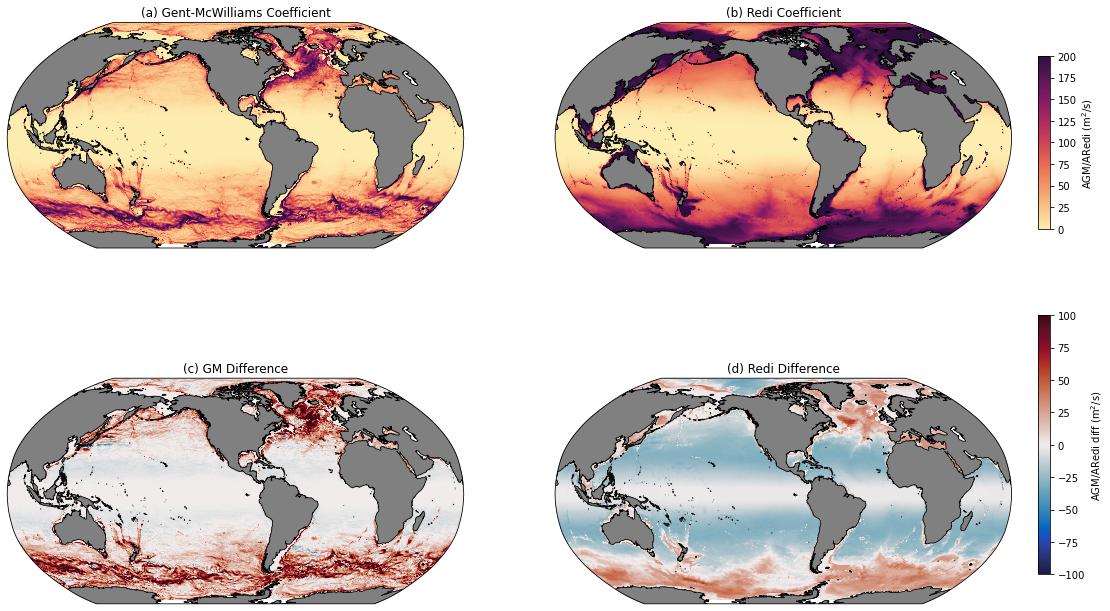

In [12]:
plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1,projection=ccrs.Robinson(central_longitude=-100))
ax1.coastlines(resolution='50m')
ax1.add_feature(land_50m)
p1 = agm_alt3.plot(ax=ax1,x='geolon_t', y='geolat_t',vmin=0,vmax=200,cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax1.set_title('(a) Gent-McWilliams Coefficient')

ax2 = plt.subplot(2,2,2,projection=ccrs.Robinson(central_longitude=-100))
ax2.coastlines(resolution='50m')
ax2.add_feature(land_50m)
aredi_alt3.plot(ax=ax2,x='geolon_t', y='geolat_t',vmin=0,vmax=200,cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax2.set_title('(b) Redi Coefficient')

ax3 = plt.subplot(2,2,3,projection=ccrs.Robinson(central_longitude=-100))
ax3.coastlines(resolution='50m')
ax3.add_feature(land_50m)
p3 = (agm_alt3-agm).plot(ax=ax3,x='geolon_t', y='geolat_t',vmin=-100,vmax=100,cmap=cm.cm.balance,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax3.set_title('(c) GM Difference')

ax4 = plt.subplot(2,2,4,projection=ccrs.Robinson(central_longitude=-100))
ax4.coastlines(resolution='50m')
ax4.add_feature(land_50m)
(aredi_alt3-aredi).plot(ax=ax4,x='geolon_t', y='geolat_t',vmin=-100,vmax=100,cmap=cm.cm.balance,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax4.set_title('(d) Redi Difference')


ax4 = plt.axes([0.92,0.6,0.01,0.2])
cb = plt.colorbar(p1,cax=ax4,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi (m$^2$/s)')


ax5 = plt.axes([0.92,0.2,0.01,0.3])
cb = plt.colorbar(p3,cax=ax5,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi diff (m$^2$/s)')

# Even more increased coefficient, and 4th power scaling

```
agm_closure_scaling = 0.21
agm_closure_grid_scaling_power = 4.0
```

In [13]:
gmfile = 'output004/ocean/ocean-2d-agm-1-monthly-mean-ym_1905_01.nc'
agm_alt4 = xr.open_dataset(dir+gmfile).agm.mean('time')
agm_alt4 = agm_alt4.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()
redifile = 'output004/ocean/ocean-2d-aredi-1-monthly-mean-ym_1905_01.nc'
aredi_alt4 = xr.open_dataset(dir+redifile).aredi.mean('time')
aredi_alt4 = aredi_alt4.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t}).load()

Text(0, 0.5, 'AGM/ARedi diff (m$^2$/s)')

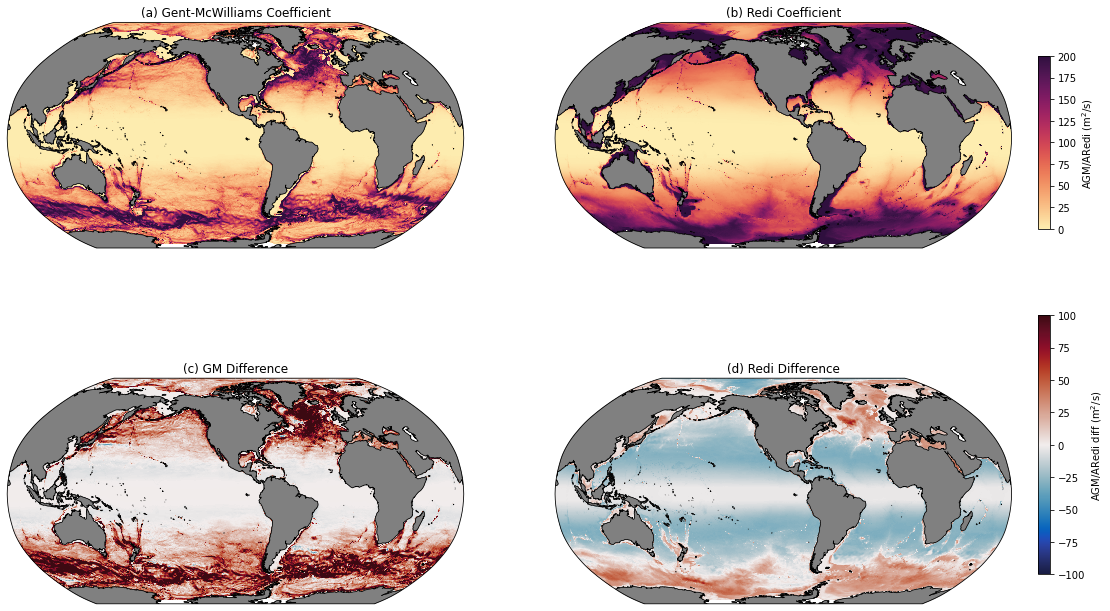

In [14]:
plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1,projection=ccrs.Robinson(central_longitude=-100))
ax1.coastlines(resolution='50m')
ax1.add_feature(land_50m)
p1 = agm_alt4.plot(ax=ax1,x='geolon_t', y='geolat_t',vmin=0,vmax=200,cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax1.set_title('(a) Gent-McWilliams Coefficient')

ax2 = plt.subplot(2,2,2,projection=ccrs.Robinson(central_longitude=-100))
ax2.coastlines(resolution='50m')
ax2.add_feature(land_50m)
aredi_alt4.plot(ax=ax2,x='geolon_t', y='geolat_t',vmin=0,vmax=200,cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax2.set_title('(b) Redi Coefficient')

ax3 = plt.subplot(2,2,3,projection=ccrs.Robinson(central_longitude=-100))
ax3.coastlines(resolution='50m')
ax3.add_feature(land_50m)
p3 = (agm_alt4-agm).plot(ax=ax3,x='geolon_t', y='geolat_t',vmin=-100,vmax=100,cmap=cm.cm.balance,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax3.set_title('(c) GM Difference')

ax4 = plt.subplot(2,2,4,projection=ccrs.Robinson(central_longitude=-100))
ax4.coastlines(resolution='50m')
ax4.add_feature(land_50m)
(aredi_alt4-aredi).plot(ax=ax4,x='geolon_t', y='geolat_t',vmin=-100,vmax=100,cmap=cm.cm.balance,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
ax4.set_title('(d) Redi Difference')


ax4 = plt.axes([0.92,0.6,0.01,0.2])
cb = plt.colorbar(p1,cax=ax4,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi (m$^2$/s)')


ax5 = plt.axes([0.92,0.2,0.01,0.3])
cb = plt.colorbar(p3,cax=ax5,orientation='vertical')
cb.ax.set_ylabel('AGM/ARedi diff (m$^2$/s)')

# Plot zonally averaged coefficients

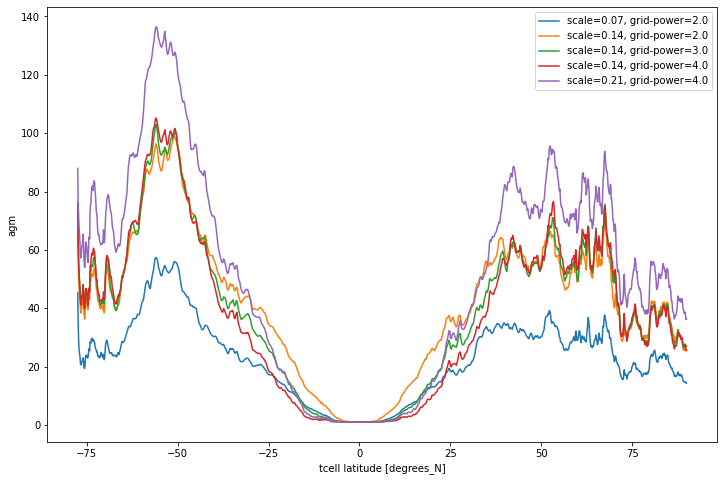

In [18]:
plt.figure(figsize=(12,8))
agm.mean('xt_ocean').plot(label='scale=0.07, grid-power=2.0')
agm_alt1.mean('xt_ocean').plot(label='scale=0.14, grid-power=2.0')
agm_alt2.mean('xt_ocean').plot(label='scale=0.14, grid-power=3.0')
agm_alt3.mean('xt_ocean').plot(label='scale=0.14, grid-power=4.0')
agm_alt4.mean('xt_ocean').plot(label='scale=0.21, grid-power=4.0')

plt.legend()


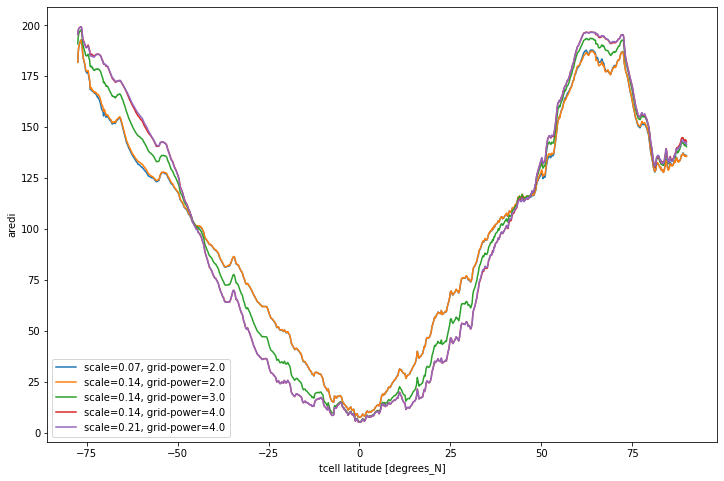

In [19]:
plt.figure(figsize=(12,8))
aredi.mean('xt_ocean').plot(label='scale=0.07, grid-power=2.0')
aredi_alt1.mean('xt_ocean').plot(label='scale=0.14, grid-power=2.0')
aredi_alt2.mean('xt_ocean').plot(label='scale=0.14, grid-power=3.0')
aredi_alt3.mean('xt_ocean').plot(label='scale=0.14, grid-power=4.0')
aredi_alt4.mean('xt_ocean').plot(label='scale=0.21, grid-power=4.0')

plt.legend()